In [3]:
import pandas as pd
import plotly.express as px

In [5]:
df_raw = pd.read_csv('Portfoliocsv.csv')

In [239]:
df_raw.head()

,Date,AAPL (apple),MSFT (microsoft),AMZN (amazon),GOOGL (Alphabet Class C),META (,ORCL (Oracle),CRM (sales force),ADBE (adobe),IBM,...,SRE,ED,XEL,PCG,EIX,FE,CMS,DTE,CNP,ES
0,2015-03-30,27.9874210357666,34.77324295043950,18.612499237060500,26.936716079711900,81.17741394042970,36.50209045410160,66.30963897705080,75.68000030517580,99.6932144165039,...,40.215126037597700,42.2707633972168,25.40495491027830,49.255733489990200,43.35630416870120,23.215116500854500,26.149015426635700,50.051422119140600,14.555708885192900,36.261845
1,2015-04-06,28.384944915771500,36.00741958618160,19.13249969482420,27.29649543762210,81.65515899658200,37.394954681396500,67.26429748535160,76.52999877929690,101.19062805175800,...,39.439842224121100,42.20835876464840,25.33917808532720,48.75021743774410,43.872127532959000,23.812898635864300,25.815568923950200,49.837974548339800,14.58381175994870,36.161591
2,2015-04-13,27.860126495361300,35.92111587524410,18.777999877929700,26.510255813598600,80.40106964111330,36.95664596557620,65.44446563720700,73.1500015258789,99.8299331665039,...,39.00833511352540,42.26383972167970,25.119922637939500,48.125213623046900,42.00143051147460,23.037742614746100,25.563650131225600,49.209903717041000,14.682159423828100,35.839367
3,2015-04-20,29.095125198364300,41.315330505371100,22.2549991607666,28.54652214050290,81.14754486083980,37.025386810302700,67.4532470703125,76.54000091552730,105.49028778076200,...,40.04689407348630,43.34574890136720,25.48535919189450,48.4744758605957,42.35219192504880,23.85888671875,26.05268096923830,50.49654769897460,14.7875337600708,36.011227
4,2015-04-27,28.79810333251950,41.99715042114260,21.14349937438970,27.4268741607666,78.61946105957030,38.13408279418950,72.95252227783200,76.43000030517580,107.90726470947300,...,39.05586624145510,42.763179779052700,24.82026481628420,49.163818359375,42.32466506958010,23.812898635864300,25.378398895263700,48.83182907104490,14.794554710388200,35.008720


In [241]:
#get list of different industries
sector_key = df_raw.iloc[-1]

sectors_list = df_raw.loc[525].dropna().unique().tolist()
if 'Date' in sectors_list:
    sectors_list.remove('Date')

In [243]:
sectors_list

['TECH',
 'Financial Services',
 'Consumer Cyclical ',
 'Healthcare',
 ' Comm / Media / Tele',
 'Industrial & Aerospace Defense',
 'Consumer & Retail',
 'Energy Sector',
 'Real Estate Sector (REITs)',
 'basic_materials']

In [217]:
# Make dictionary of every company in each industry
df_sectors = {}

for i in sectors_list:
    df_sectors[f'{i}'] = sector_key[sector_key == f'{i}'].index.to_list()
    
    # Drop "Date" if it exists in the index
    if 'Date' in df_sectors[f'{i}']:
        df_sectors[f'{i}'].remove('Date')  # Use remove() since it's a list

In [219]:
# Example
df_sectors['TECH']

['AAPL (apple)',
 'MSFT (microsoft)',
 'AMZN (amazon)',
 'GOOGL (Alphabet Class C)',
 'META (',
 'ORCL (Oracle)',
 'CRM (sales force)',
 'ADBE (adobe)',
 'IBM ',
 'INTC (Intel)',
 'Adobe (TECH)',
 'NVDA (10 year data)']

In [221]:
# Calculate weekly average and weekly return for each industry

df_averages = df_raw.copy()

df_averages = df_averages.iloc[:-4]

# Assuming df_raw is your raw data
date_col = 'Date'  # Change this to match your actual date column name

# Apply `pd.to_numeric()` only to non-date columns
df_averages.loc[:, df_averages.columns != date_col] = df_averages.loc[:, df_averages.columns != date_col].apply(pd.to_numeric, errors='coerce')

for sector in sectors_list:
    # Now, you can calculate the average safely
    sector_mask = df_sectors[f'{sector}']
    
    # Compute the average of 'df_raw' for rows where the 'TECH' sector is True
    df_averages[f'{sector}_avg'] = df_averages[sector_mask].mean(axis=1)
    
    #Return average
    df_averages[f'{sector}_wk_rtrn'] = df_averages[f'{sector}_avg'].diff()

In [245]:
df_averages.head()

,Date,AAPL (apple),MSFT (microsoft),AMZN (amazon),GOOGL (Alphabet Class C),META (,ORCL (Oracle),CRM (sales force),ADBE (adobe),IBM,...,Industrial & Aerospace Defense_avg,Industrial & Aerospace Defense_wk_rtrn,Consumer & Retail_avg,Consumer & Retail_wk_rtrn,Energy Sector_avg,Energy Sector_wk_rtrn,Real Estate Sector (REITs)_avg,Real Estate Sector (REITs)_wk_rtrn,basic_materials_avg,basic_materials_wk_rtrn
0,2015-03-30,27.987421,34.773243,18.612499,26.936716,81.177414,36.50209,66.309639,75.68,99.693214,...,93.631419,NaN,52.122997,NaN,39.898648,NaN,75.877977,NaN,58.834267,NaN
1,2015-04-06,28.384945,36.00742,19.1325,27.296495,81.655159,37.394955,67.264297,76.529999,101.190628,...,96.717397,3.085978,52.273974,0.150977,40.43665,0.538003,74.706885,-1.171092,59.524143,0.689876
2,2015-04-13,27.860126,35.921116,18.778,26.510256,80.40107,36.956646,65.444466,73.150002,99.829933,...,93.979837,-2.73756,51.860162,-0.413811,40.361774,-0.074876,73.976692,-0.730192,58.944524,-0.579619
3,2015-04-20,29.095125,41.315331,22.254999,28.546522,81.147545,37.025387,67.453247,76.540001,105.490288,...,94.477405,0.497567,52.057919,0.197757,41.054324,0.692549,75.209221,1.232529,59.681231,0.736707
4,2015-04-27,28.798103,41.99715,21.143499,27.426874,78.619461,38.134083,72.952522,76.43,107.907265,...,94.591945,0.11454,51.719855,-0.338063,40.840962,-0.213362,74.088668,-1.120554,60.263371,0.58214


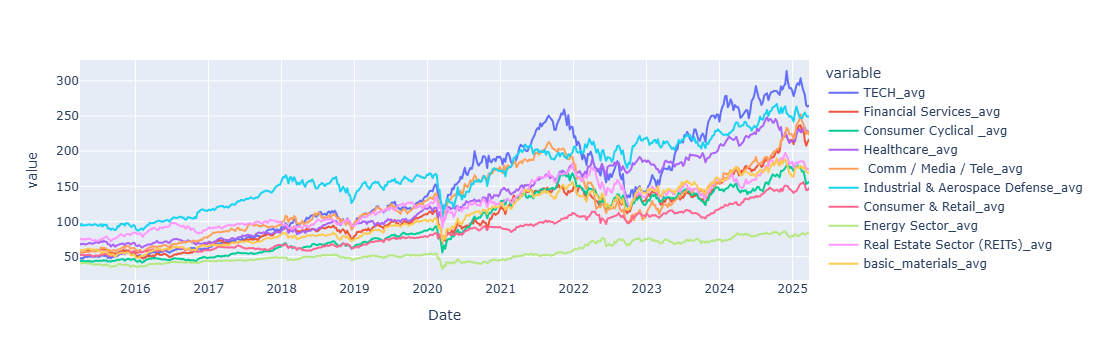

In [237]:
# Plot the weekly value of every industry

col_averages_weekly = [col for col in df_averages.columns if '_avg' in col]

fig = px.line(df_averages, x='Date', y=col_averages_weekly)
fig.show()

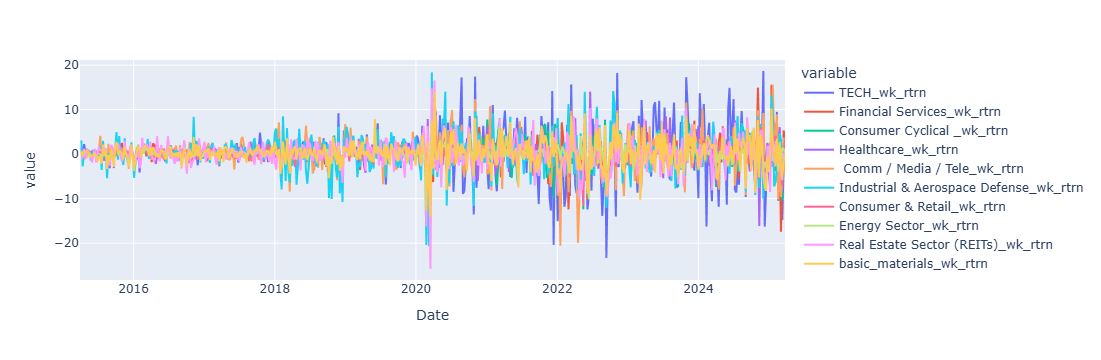

In [235]:
# Plot the weekly portfolio change for every industry

col_averages_returns = [col for col in df_averages.columns if '_rtrn' in col]

fig = px.line(df_averages, x='Date', y=col_averages_returns)
fig.show()

Plot stocks in a particular group

In [252]:
# Plots the individual stocks for a specific industry
def plot_stocks_for_industry(df, industry):
    col_names = df_sectors[industry]

    fig = px.line(df, x='Date', y=col_names)
    return fig

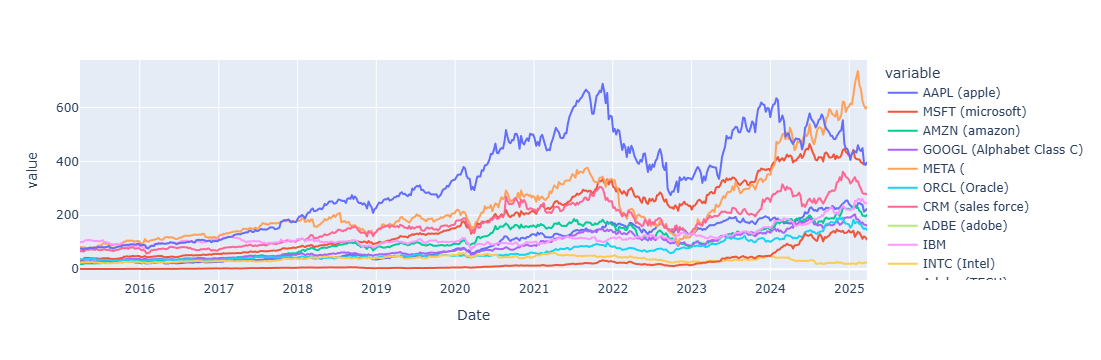

In [254]:
plot_stocks_for_industry(df_averages, 'TECH')

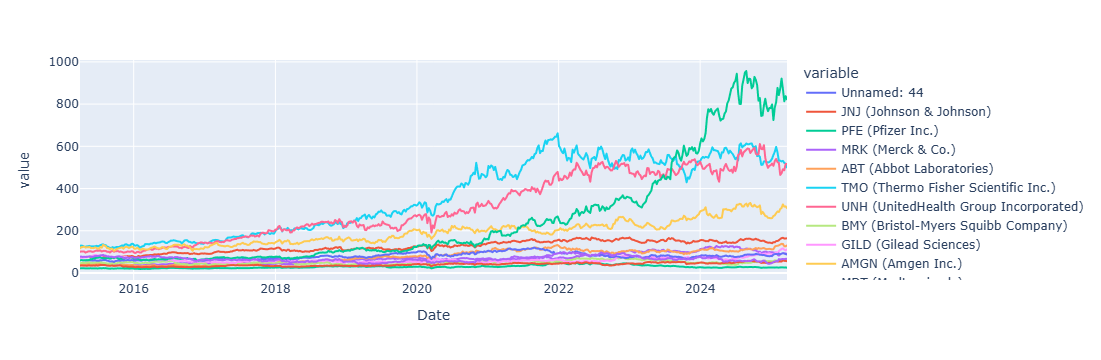

In [258]:
plot_stocks_for_industry(df_averages, 'Healthcare')